In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter



In [ ]:
data = pd.read_csv('who_suicide_statistics.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [ ]:
data.head(15)

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0
5,Albania,1985,female,75+ years,NaN,34200.0
6,Albania,1985,male,15-24 years,NaN,301400.0
7,Albania,1985,male,25-34 years,NaN,264200.0
8,Albania,1985,male,35-54 years,NaN,296700.0
9,Albania,1985,male,5-14 years,NaN,325800.0


In [ ]:
data.describe()

,year,suicides_no,population
count,43776.000000,41520.000000,3.831600e+04
mean,1998.502467,193.315390,1.664091e+06
std,10.338711,800.589926,3.647231e+06
min,1979.000000,0.000000,2.590000e+02
25%,1990.000000,1.000000,8.511275e+04
50%,1999.000000,14.000000,3.806550e+05
75%,2007.000000,91.000000,1.305698e+06
max,2016.000000,22338.000000,4.380521e+07


In [ ]:
data["suicides_no"] = data["suicides_no"].fillna(0)

In [ ]:
data.count()

country        43776
year           43776
sex            43776
age            43776
suicides_no    43776
population     38316
dtype: int64

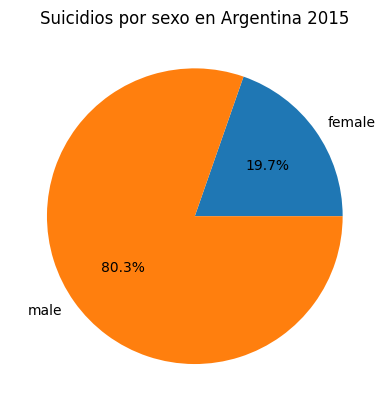

In [ ]:
#Un gráfico circular de un solo año. Esto seria algo bueno
dato_2016 = data[(data['year']==2015) & (data['country']=='Argentina')].groupby('sex')['suicides_no'].sum()

plt.pie(
    dato_2016,                 # valores
    labels=dato_2016.index,    # etiquetas (M/F)
    autopct="%1.1f%%"        # mostrar porcentajes
)
plt.title("Suicidios por sexo en Argentina 2015")
plt.show()


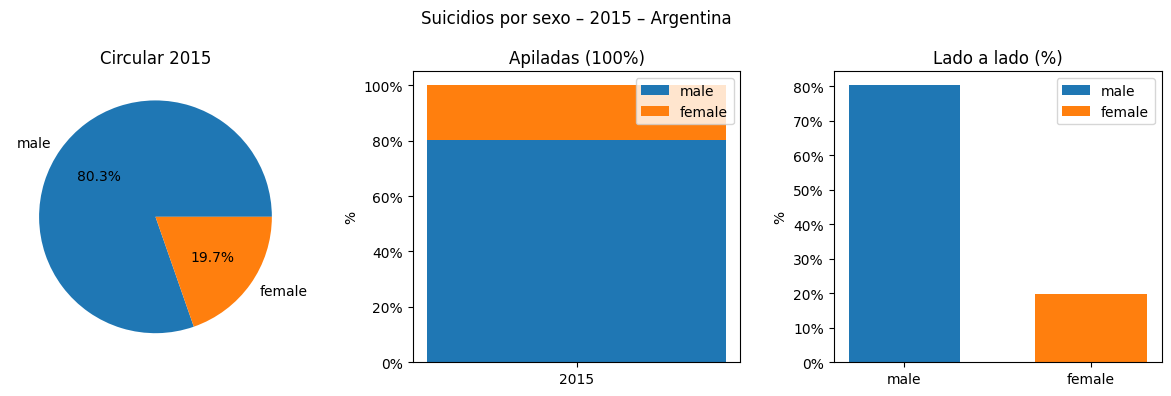

In [ ]:
#comparacion, se ve la ventaja de uno sobre otro
anio = 2015
from matplotlib.ticker import PercentFormatter

anio = 2015
serie = (
    data[(data['year']==anio) & (data['country']== 'Argentina')]
    .groupby('sex')['suicides_no'].sum()
    .reindex(['male','female']).fillna(0)
)
total = serie.sum()
p = serie / total  # proporciones

fig, axes = plt.subplots(1, 3, figsize=(12,4))
# Pie (% ya lo muestra autopct)
axes[0].pie(p.values, labels=p.index, autopct='%1.1f%%')
axes[0].set_title(f'Circular {anio}')

# Barras apiladas 100%
axes[1].bar([0], [p['male']], label='male')
axes[1].bar([0], [p['female']], bottom=[p['male']], label='female')
axes[1].set_xticks([0]); axes[1].set_xticklabels([str(anio)])
axes[1].yaxis.set_major_formatter(PercentFormatter(1.0))
axes[1].set_ylabel('%'); axes[1].set_title('Apiladas (100%)'); axes[1].legend()

# Barras lado a lado en %
axes[2].bar([0], [p['male']], width=0.6, label='male')
axes[2].bar([1], [p['female']], width=0.6, label='female')
axes[2].set_xticks([0,1]); axes[2].set_xticklabels(['male','female'])
axes[2].yaxis.set_major_formatter(PercentFormatter(1.0))
axes[2].set_ylabel('%'); axes[2].set_title('Lado a lado (%)'); axes[2].legend()

plt.suptitle(f'Suicidios por sexo – {anio} – Argentina')
plt.tight_layout(); plt.show()


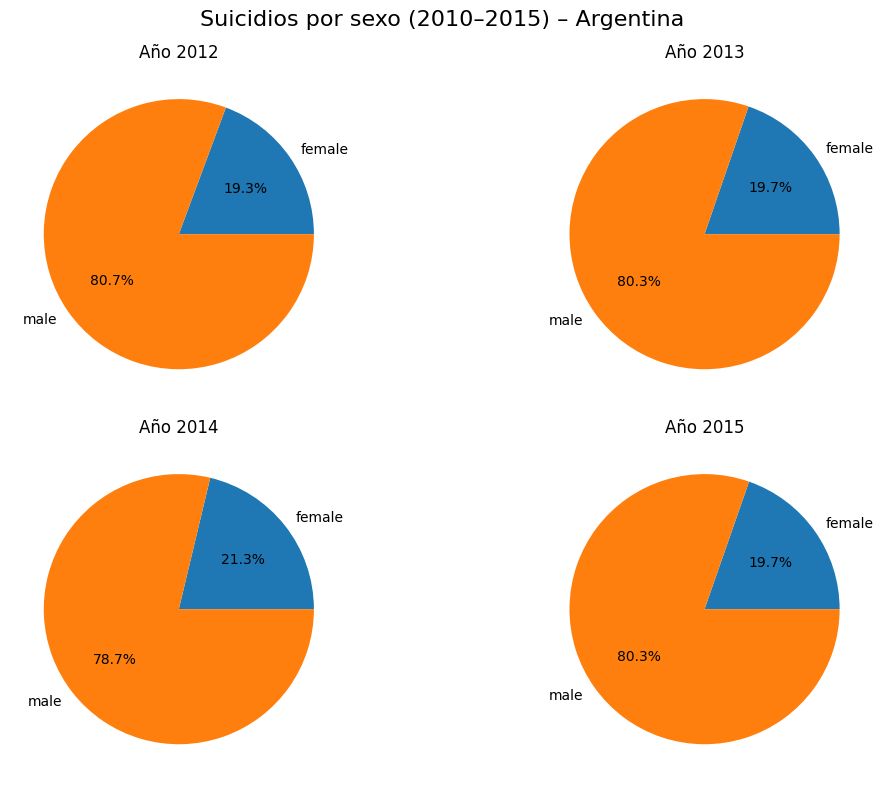

In [ ]:
#Un gráfico circular para varios años. Esto no es tan bueno
filtro_2010_2016 = (data['year'] >=2010) &  (data['year']<=2015) & (data['country']== 'Argentina')
tabla = (data[filtro_2010_2016].groupby(['year','sex'])['suicides_no'].sum().unstack().fillna(0).sort_index() )

anios = range(2012,2016)
fia, axes = plt.subplots(2,2, figsize =(12,8))
for ax, anio in zip(axes.flat,anios):
    valores = tabla.loc[anio] 
    ax.pie(
        valores.values,
        labels=valores.index,
        autopct='%1.1f%%'
    )
    ax.set_title(f"Año {anio}")
plt.suptitle("Suicidios por sexo (2010–2015) – Argentina", fontsize=16)
plt.tight_layout()
plt.show()  



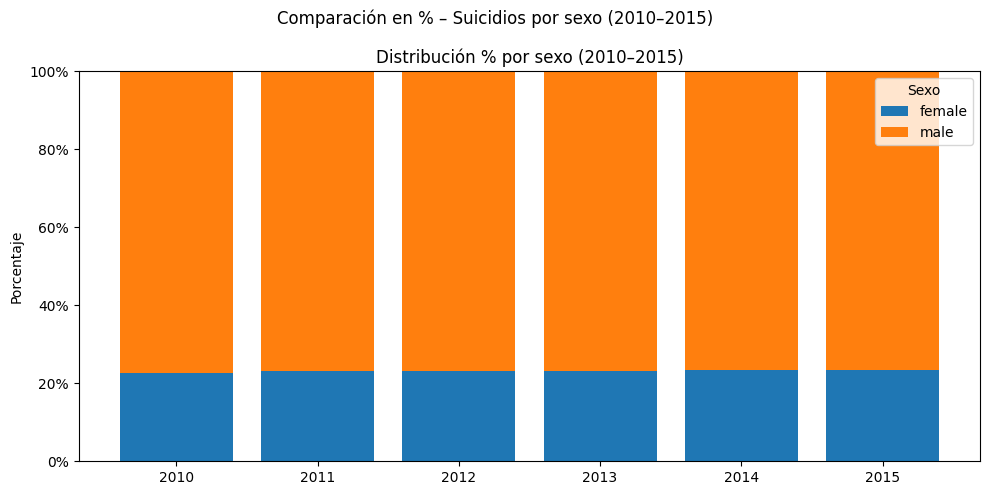

In [ ]:
#con barra apiladas se ve mejor
# --- Proporciones por año (cada fila suma 1) ---
prop = tabla.div(tabla.sum(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(10, 5))

bottom = np.zeros(len(prop))
for col in prop.columns:   # 'female', 'male'
    ax.bar(prop.index.astype(str), prop[col], bottom=bottom, label=col)
    bottom += prop[col]

ax.set_title("Distribución % por sexo (2010–2015)")
ax.set_ylabel("Porcentaje")
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
ax.set_ylim(0, 1)
ax.legend(title="Sexo")

plt.suptitle("Comparación en % – Suicidios por sexo (2010–2015)")
plt.tight_layout()
plt.show()

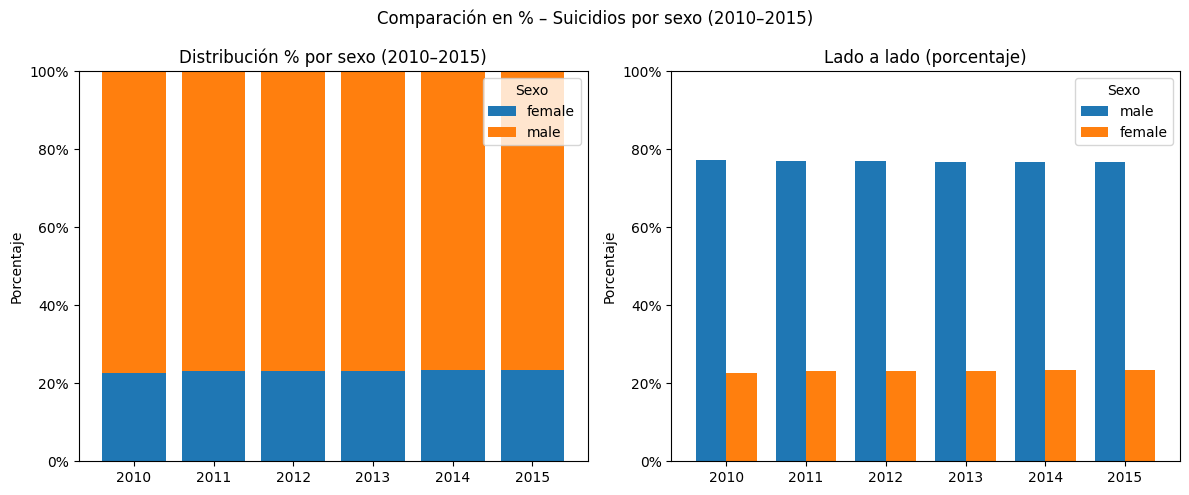

In [ ]:
#Un gráfico con barras apiladas para varios años. Esto es bueno, porque se ve claramente la diferencia



# 1) Filtrar 2010–2015 y agregar
filtro = (data['year'] >= 2010) & (data['year'] <= 2015)
tabla = (
    data[filtro]
    .groupby(['year','sex'])['suicides_no']
    .sum()
    .unstack()
    .fillna(0)
    .sort_index()
)

# 2) Proporciones por año (cada fila suma 1)
prop = tabla.div(tabla.sum(axis=1), axis=0)

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

# --- (a) Barras 100% apiladas (en %) ---
bottom = np.zeros(len(prop))
for col in prop.columns:           # 'female', 'male'
    axes[0].bar(prop.index.astype(str), prop[col], bottom=bottom, label=col)
    bottom += prop[col]
axes[0].set_title("Distribución % por sexo (2010–2015)")
axes[0].set_ylabel("Porcentaje")
axes[0].yaxis.set_major_formatter(PercentFormatter(1.0))
axes[0].set_ylim(0, 1)
axes[0].legend(title="Sexo")

# --- (b) Barras lado a lado (también en %) ---
x = np.arange(len(prop.index))
width = 0.38
axes[1].bar(x - width/2, prop['male'],   width, label='male')
axes[1].bar(x + width/2, prop['female'], width, label='female')
axes[1].set_title("Lado a lado (porcentaje)")
axes[1].set_ylabel("Porcentaje")
axes[1].set_xticks(x)
axes[1].set_xticklabels(prop.index.astype(str))
axes[1].yaxis.set_major_formatter(PercentFormatter(1.0))
axes[1].set_ylim(0, 1)
axes[1].legend(title="Sexo")

plt.suptitle("Comparación en % – Suicidios por sexo (2010–2015)")
plt.tight_layout()
plt.show()